<a href="https://colab.research.google.com/github/jakes1811/PRODIGY_ML_01/blob/main/Prediction%20of%20house%20price%20using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the training data
train_data = pd.read_csv('/content/train.csv')

# Load the test data
test_data = pd.read_csv('/content/test.csv')


In [ ]:

# Define the features to use for the model
features = ['GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']

# Extract features and target from training data
X_train = train_data[features]
y_train = train_data['SalePrice']

# Initialize imputer to replace missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
test_data[features] = imputer.transform(test_data[features]) # Impute missing values in test data

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the training data (for visualization purposes)
train_data['PredictedPrice'] = model.predict(X_train)

# Predict on the test data
test_data['PredictedPrice'] = model.predict(test_data[features])



In [25]:
# Function to get user input and predict house price
def predict_house_price():
    # Get user input for each feature
    GrLivArea = float(input("Enter the above ground living area in square feet: "))
    TotalBsmtSF = float(input("Enter the total basement area in square feet: "))
    FullBath = int(input("Enter the number of full bathrooms: "))
    HalfBath = int(input("Enter the number of half bathrooms: "))
    BedroomAbvGr = int(input("Enter the number of bedrooms above grade: "))

    # Create a DataFrame with the user input
    user_input = pd.DataFrame({
        'GrLivArea': [GrLivArea],
        'TotalBsmtSF': [TotalBsmtSF],
        'FullBath': [FullBath],
        'HalfBath': [HalfBath],
        'BedroomAbvGr': [BedroomAbvGr]
    })

    # Predict the house price using the trained model
    predicted_price = model.predict(user_input)[0]

    # Print the predicted price
    print(f"The predicted house price is: ${predicted_price:,.2f}")

# Call the function to get input and predict price
predict_house_price()


Enter the above ground living area in square feet: 2500
Enter the total basement area in square feet: 1250
Enter the number of full bathrooms: 3
Enter the number of half bathrooms: 2
Enter the number of bedrooms above grade: 4
The predicted house price is: $314,968.29


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


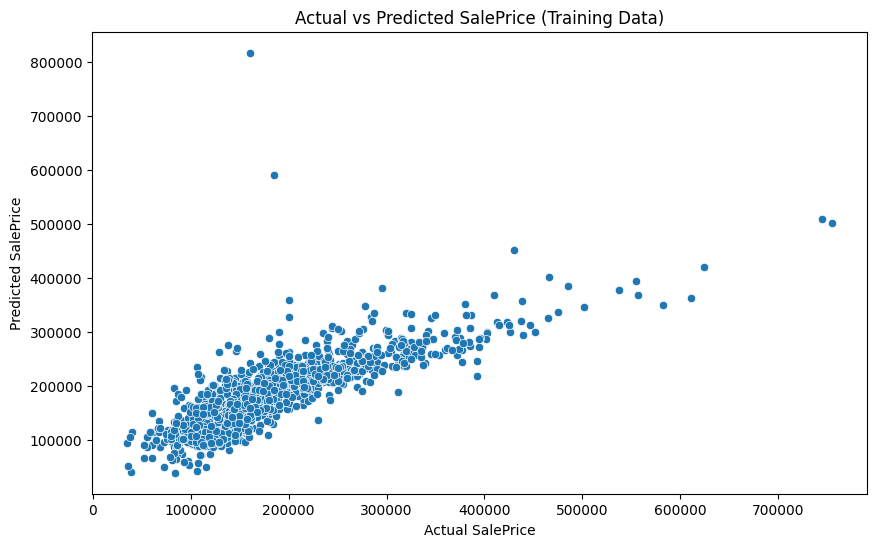

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=train_data['PredictedPrice'])
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Training Data)')
plt.show()


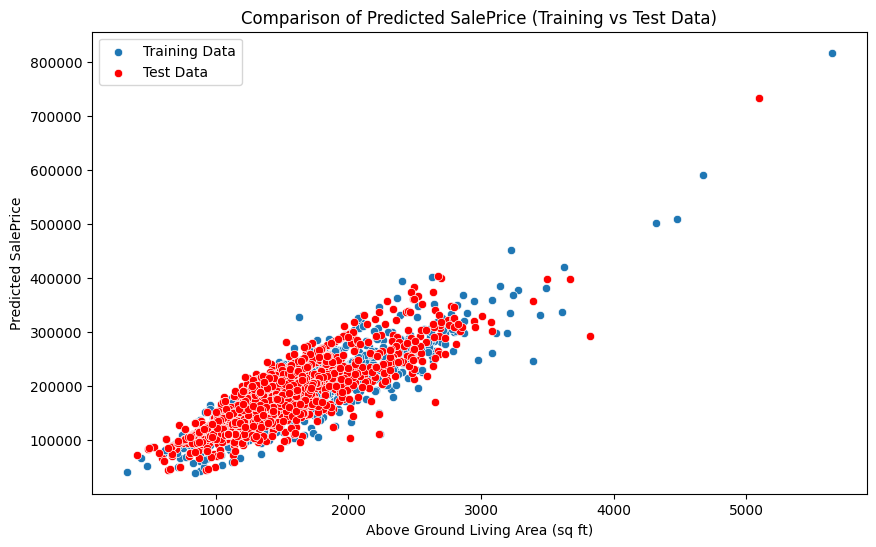

In [30]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=train_data['GrLivArea'], y=train_data['PredictedPrice'], label='Training Data')
sns.scatterplot(x=test_data['GrLivArea'], y=test_data['PredictedPrice'], label='Test Data', color='red')

plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Predicted SalePrice')
plt.title('Comparison of Predicted SalePrice (Training vs Test Data)')
plt.legend()
plt.show()
